In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
PATH_OF_DATA = '/content/gdrive/MyDrive/images'
!ls {PATH_OF_DATA}

'Bitter gourd'	'Ground nut'  'Mature tea tree'  'White Gigantic swallow wort'
 Capsicum	 Lime	      'Mustard tree'	  Wood-apple
 Chilli		 Maila	      'Sickle Senna'


# **Preparing the data** 

In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

In [ ]:
file_list = []
class_list = []

DATADIR = str(PATH_OF_DATA)

In [ ]:
CATEGORIES = ["Bitter gourd", "Capsicum", "Chilli", "Ground nut", "Lime", "Maila", "Mature tea tree", "Mustard tree", "Sickle Senna", "White Gigantic swallow wort", "Wood-apple"]

In [ ]:
IMG_SIZE = 50

In [ ]:
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

In [ ]:
training_data = []

In [ ]:
def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

In [ ]:
random.shuffle(training_data)

In [ ]:
X = [] #features
y = [] #labels

In [ ]:
for features, label in training_data:
	X.append(features)
	y.append(label)

In [ ]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

# **Building the CNN**

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

In [ ]:
# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

In [ ]:
from tensorflow.keras import layers

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
model = tf.keras.Sequential([resize_and_rescale, data_augmentation])

In [ ]:
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

In [ ]:
# The output layer with 11 neurons, for 11 classes
model.add(Dense(11))
model.add(Activation("softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
IMG_SIZE = 50

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)

Epoch 1/40
2/2 [==============================] - 0s 87ms/step - loss: 2.4182 - accuracy: 0.0571 - val_loss: 2.4692 - val_accuracy: 0.0000e+00
Epoch 2/40
2/2 [==============================] - 0s 19ms/step - loss: 2.4138 - accuracy: 0.0571 - val_loss: 2.4656 - val_accuracy: 0.0000e+00
Epoch 3/40
2/2 [==============================] - 0s 19ms/step - loss: 2.4116 - accuracy: 0.0571 - val_loss: 2.4616 - val_accuracy: 0.0000e+00
Epoch 4/40
2/2 [==============================] - 0s 18ms/step - loss: 2.4098 - accuracy: 0.0571 - val_loss: 2.4598 - val_accuracy: 0.0000e+00
Epoch 5/40
2/2 [==============================] - 0s 19ms/step - loss: 2.4096 - accuracy: 0.0571 - val_loss: 2.4577 - val_accuracy: 0.0000e+00
Epoch 6/40
2/2 [==============================] - 0s 19ms/step - loss: 2.4088 - accuracy: 0.0571 - val_loss: 2.4555 - val_accuracy: 0.0000e+00
Epoch 7/40
2/2 [==============================] - 0s 20ms/step - loss: 2.4083 - accuracy: 0.0571 - val_loss: 2.4535 - val_accuracy: 0.0000e+00

In [ ]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model.save('CNN.model')

INFO:tensorflow:Assets written to: CNN.model/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


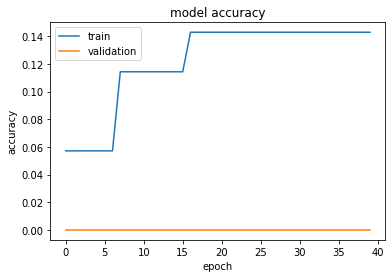

In [ ]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')